In [1]:
%matplotlib inline
from __future__ import print_function
from scipy.stats import linregress

import numpy as np
import matplotlib.pylab as plt
import operator as op

import json

def xvals(v): return [e[0] for e in v]
def yvals(v): return [e[1] for e in v]

In [2]:
def getdatafor(summaries):
    # accumulate results by key (n, d, a, b)
    results = {}
    for summary in summaries:
        if not summary["converged"]:
            print("warn: did not converge")
        d = (summary["a"] + summary["b"])/2.0
        key = (summary["n"], d, summary["a"], summary["b"])
        acc = results.get(key, [])
        acc.append(summary)
        results[key] = acc
        
    # sanity check
    print("--- sanity checking data ---")
    total = 0
    for key, value in results.iteritems():
        nsamples = len(value)
        n = key[0]
        print(key, nsamples, nsamples * n)
        total += nsamples
    print("total", total)
    
    def getdata():
        for key, value in results.iteritems():
            qvals = np.array([v["correlation"]for v in value])
            top = (qvals ** 4).mean()
            bot = ((qvals ** 2).mean()) ** 2
            binder = top / bot
            n, d, a, b = key
            lam = (a-b)/np.sqrt(2.0*(a+b))
            yield n, d, lam, binder
    return list(getdata())

## d=10 line (Figure 15, bottom)
This one is fine, although the binder numbers reported here are slightly higher than in the paper.

In [3]:
with open("results-d10.0.txt", "r") as fp:
    summaries = [json.loads(line) for line in fp]

In [4]:
data = getdatafor(summaries)

--- sanity checking data ---
(32000, 10.0, 13.241334601672587, 6.758665398327411) 20000 640000000
(16000, 10.0, 13.193900436770065, 6.806099563229937) 40000 640000000
(16000, 10.0, 13.209711825070904, 6.7902881749290955) 40000 640000000
(32000, 10.0, 13.193900436770065, 6.806099563229937) 20000 640000000
(16000, 10.0, 13.225523213371748, 6.774476786628252) 40000 640000000
(16000, 10.0, 13.178089048469221, 6.8219109515307785) 40000 640000000
(32000, 10.0, 13.178089048469221, 6.8219109515307785) 20000 640000000
(16000, 10.0, 13.25714598997343, 6.742854010026569) 40000 640000000
(32000, 10.0, 13.25714598997343, 6.742854010026569) 20000 640000000
(32000, 10.0, 13.209711825070904, 6.7902881749290955) 20000 640000000
(16000, 10.0, 13.241334601672587, 6.758665398327411) 40000 640000000
(32000, 10.0, 13.162277660168378, 6.83772233983162) 20000 640000000
(16000, 10.0, 13.162277660168378, 6.83772233983162) 40000 640000000
(32000, 10.0, 13.225523213371748, 6.774476786628252) 20000 640000000
total

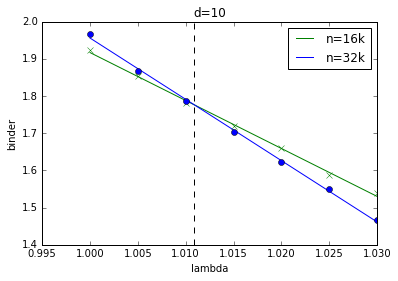

In [5]:
line_n32k = sorted([(v[2], v[3]) for v in data if v[0] == 32000], key=op.itemgetter(0))
line_n16k = sorted([(v[2], v[3]) for v in data if v[0] == 16000], key=op.itemgetter(0))

m1, b1, _, _, _ = linregress(xvals(line_n16k), yvals(line_n16k))
m2, b2, _, _, _ = linregress(xvals(line_n32k), yvals(line_n32k))
xcross = (b2-b1)/(m1-m2)

xaxis = np.linspace(np.min(xvals(line_n16k)), np.max(xvals(line_n16k)), 100)
plt.plot(xaxis, m1*xaxis + b1, 'g',
         xaxis, m2*xaxis + b2, 'b')
plt.legend(["n=16k", "n=32k"])
plt.plot(xvals(line_n16k), yvals(line_n16k), 'gx',
         xvals(line_n32k), yvals(line_n32k), 'bo')
plt.axvline(xcross, color='k', linestyle='--')
plt.xlabel("lambda")
plt.ylabel("binder")
plt.title("d=10")

In [6]:
print(xcross)

1.01088542574


## d=2 line (Figure 15, top)
This one is broken. The binder numbers are just noise.

In [7]:
with open("results-d2.0.txt", "r") as fp:
    summaries = [json.loads(line) for line in fp]

In [8]:
data = getdatafor(summaries)

--- sanity checking data ---
(16000, 2.0, 3.456639969244288, 0.543360030755712) 40000 640000000
(32000, 2.0, 3.4495689014324222, 0.5504310985675775) 20000 640000000
(16000, 2.0, 3.42128463018496, 0.5787153698150396) 40000 640000000
(16000, 2.0, 3.4283556979968264, 0.5716443020031738) 40000 640000000
(16000, 2.0, 3.414213562373095, 0.5857864376269049) 40000 640000000
(32000, 2.0, 3.456639969244288, 0.543360030755712) 20000 640000000
(32000, 2.0, 3.442497833620557, 0.5575021663794428) 20000 640000000
(32000, 2.0, 3.42128463018496, 0.5787153698150396) 20000 640000000
(16000, 2.0, 3.4495689014324222, 0.5504310985675775) 40000 640000000
(32000, 2.0, 3.414213562373095, 0.5857864376269049) 20000 640000000
(16000, 2.0, 3.442497833620557, 0.5575021663794428) 40000 640000000
(16000, 2.0, 3.4354267658086917, 0.5645732341913086) 40000 640000000
(32000, 2.0, 3.4354267658086917, 0.5645732341913086) 20000 640000000
(32000, 2.0, 3.4283556979968264, 0.5716443020031738) 20000 640000000
total 420000


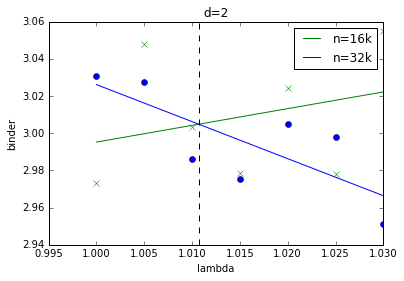

In [9]:
line_n32k = sorted([(v[2], v[3]) for v in data if v[0] == 32000], key=op.itemgetter(0))
line_n16k = sorted([(v[2], v[3]) for v in data if v[0] == 16000], key=op.itemgetter(0))

m1, b1, _, _, _ = linregress(xvals(line_n16k), yvals(line_n16k))
m2, b2, _, _, _ = linregress(xvals(line_n32k), yvals(line_n32k))
xcross = (b2-b1)/(m1-m2)

xaxis = np.linspace(np.min(xvals(line_n16k)), np.max(xvals(line_n16k)), 100)
plt.plot(xaxis, m1*xaxis + b1, 'g',
         xaxis, m2*xaxis + b2, 'b')
plt.legend(["n=16k", "n=32k"])
plt.plot(xvals(line_n16k), yvals(line_n16k), 'gx',
         xvals(line_n32k), yvals(line_n32k), 'bo')
plt.axvline(xcross, color='k', linestyle='--')
plt.xlabel("lambda")
plt.ylabel("binder")
plt.title("d=2")